# Naked call

This [strategy](https://www.investopedia.com/articles/optioninvestor/122701.asp) consists of a trader selling a number of call options for which s/he does not own the underlying asset.

If the stock price remains below the strike price of the call options at expiration, the trader pockets the option premium, at least partially.

On the other hand, if the stock price rises above the strike price, the losses are unlimited. Naked call is one of the riskiest option strategies.

**Caveat: Options are very risky derivatives and, like any other type of financial vehicle, trading options requires due diligence. Transactions shown as examples of trading strategies with options in this notebook are not recommendations.**

In [1]:
from __future__ import print_function
import sys
from optionlab import __version__
from optionlab.strategy import Strategy
%matplotlib inline

In [2]:
print("Python version: %s" % sys.version)
print("optionlab version: %s" % __version__)

Python version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
optionlab version: 0.1


A *Strategy* object is instantiated.

In [3]:
st=Strategy()

The data used in the calculations are passed to the *getdata()* method of the newly created *Strategy* object.

In this case, the data refers to Apple stocks (ticker: APPL) on November 22, 2021. The maturity of the call option was November 17, 2021.

The naked call setup consists of selling 100 175.00 strike calls for 1.15 each.

The probability of profit (PoP) was estimated on the target date, which corresponds to the option's maturity.

In [4]:
distribution="black-scholes"
stockprice=164.04
volatility=0.272
startdate="2021-11-22"
targetdate="2021-12-17"
interestrate=0.0002
minstock=stockprice-round(stockprice*0.5,2)
maxstock=stockprice+round(stockprice*0.5,2)
strategy=[{"type":"call","strike":175.00,"premium":1.15,"n":100,"action":"sell"}]

st.getdata(stockprice=stockprice,startdate=startdate,targetdate=targetdate,volatility=volatility,interestrate=interestrate,
           minstock=minstock,maxstock=maxstock,strategy=strategy,distribution=distribution)

The calculations are carried out by the *run()* method of the Strategy object and the output is stored in a Python dictionary.

In [5]:
%%time
out=st.run()

Wall time: 3 ms


Profit/loss profile is plotted by calling the *plotPL()* method of the Strategy object.

P/L profile diagram:
--------------------
The vertical green dashed line corresponds to the position of the stock's spot price. The right and left arrow markers indicate the strike prices of calls and puts, respectively, with blue representing long and red representing short positions.


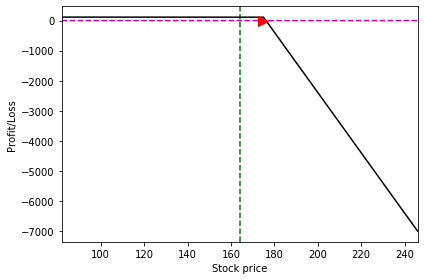

In [6]:
st.plotPL()

Below one can see some useful, additional results of the calculations made for the strategy, including its PoP.

In [7]:
print("Days remaining to the target date: %d" % st.days2target)
print("Maximum loss: %.2f" % abs(out["MinimumReturnInTheDomain"]))
print("Maximum profit: %.2f" % out["MaximumReturnInTheDomain"])
print("Profitable stock price range:")

for profrange in out["ProfitRanges"]:
    print("      %.2f ---> %.2f" % (profrange[0],profrange[1]))

print("Probability of Profit (PoP): %.1f%%" % (out["ProbabilityOfProfit"]*100.0))

Days remaining to the target date: 18
Maximum loss: 6987.00
Maximum profit: 115.00
Profitable stock price range:
      0.00 ---> 176.14
Probability of Profit (PoP): 84.5%
